# 2021/9/30
# 本代码计算四月下旬和五月上旬的上层经向温度梯度差
# 探讨famil与merra2资料之间的差异

In [1]:
import xarray as xr
import numpy as np
import os

In [41]:
path1  =  "D:/data/download_2021-09-30_09-55-16/year_mean/multi/"
lat_slice    =  slice(-10,30)
lev_slice    =  slice(700,700)
lon_slice    =  slice(30,120)
f1     =  xr.open_dataset(path1+"0101.climate.nc").sel(lat=lat_slice,lon=lon_slice,lev=lev_slice)
file1  =  os.listdir(path1) ; file1.sort()
avg_t_april  =  np.zeros((f1.T.data.shape[2],f1.T.data.shape[3]))
#avg_h_april  =  avg_t_april.copy()
avg_t_may    =  avg_t_april.copy()
#avg_h_may    =  avg_t_april.copy()


for i in range(90,120):
    ff1  =  xr.open_dataset(path1+file1[i]).sel(lat=lat_slice,lon=lon_slice,lev=lev_slice)
    avg_t_april += np.average(ff1.T.data[0,:],axis=0)/30
    #avg_h_april += np.average(ff1.H.data[0,:],axis=0)/30
    ff2  =  xr.open_dataset(path1+file1[i+30]).sel(lat=lat_slice,lon=lon_slice,lev=lev_slice)
    avg_t_may += np.average(ff2.T.data[0,:],axis=0)/30
    #avg_h_april += np.average(ff2.H.data[0,:],axis=0)/30
    
path2  =  "D:/data/download_2021-09-30_09-55-16/zhuang_plev/"
f2     =  xr.open_dataset(path2+"plev_con_T.nc").sel(lat=lat_slice,lon=lon_slice,lev=lev_slice)
avg_t2_april  =  np.average(np.average(f2.T.data[90:120,:],axis=1),axis=0)
avg_t2_may    =  np.average(np.average(f2.T.data[120:150,:],axis=1),axis=0)



In [42]:
intep1_t2_april  =  np.zeros((43,145))  ;  intep1_t2_may  =  intep1_t2_april.copy()
intep_t2_april   =  np.zeros((81,145))  ;  intep_t2_may   =  intep_t2_april.copy()
for i in range(0,43):
    intep1_t2_april[i,:]  =  np.interp(f1.lon.data,f2.lon.data,avg_t2_april[i,:])
    intep1_t2_may[i,:]    =  np.interp(f1.lon.data,f2.lon.data,avg_t2_may[i,:])
for j in range(0,145):
    intep_t2_april[:,j]   =  np.interp(f1.lat.data,f2.lat.data,intep1_t2_april[:,j])
    intep_t2_may[:,j]     =  np.interp(f1.lat.data,f2.lat.data,intep1_t2_may[:,j])
    
avg_t2_april  =  intep_t2_april
avg_t2_may    =  intep_t2_may

diff_april    =  avg_t2_april - avg_t_april
diff_may      =  avg_t2_may   - avg_t_may
#至此已经计算出famil实验与merra2数据之间的上层温度偏差

In [43]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
lats  =  np.linspace(-10,30,5)
lons  =  np.linspace(30,120,10)

In [44]:
fig  =  plt.figure(figsize=(5,5))
ax   =  plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

C:\Users\nuist\anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


URLError: <urlopen error [Errno 11001] getaddrinfo failed>

<Figure size 360x360 with 1 Axes>

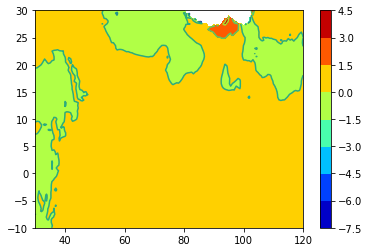

In [46]:
plt.contour(f1.lon,f1.lat,diff_april)
im = plt.contourf(f1.lon,f1.lat,diff_april,cmap='jet')
plt.colorbar(im)

In [40]:
plt.show()